# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 4  AC 209: GLMs


**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner


<hr style="height:2pt">

In [1]:
# RUN THIS CELL FOR FORMAT
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

<div class='exercise'> <b> Question 1 [20 pts] </b> </div>

The probability density function of Poisson distribution is given by:
$$ p(y|\lambda) =  \frac{\lambda^{y}}{y!} e^{-\lambda}.$$


**1.1** Show that Poisson distribution belongs to the general exponential distribution family with probability density:

$$f(y|\theta)= \exp\left( \frac{y  \,\theta-b(\theta)}{\phi}+c(y,\phi)\right).$$

**1.2** For the Poisson distribution calculate the canonical parameter $\theta$ in terms of $\lambda$, the cumulant function $b(\theta)$, the dispersion parameter $\phi$, and the normalization function $c(y,\phi)$.

**1.3**  Show that the canonical link $g(.)$ for the Poisson regression model is given by:
$$\eta = g(\lambda) = \log(\lambda).$$

**1.4** Derive to the *normal equations* that maximizes the likelihood in the Poisson regression model.

**1.5** Write a function (call is `pois_loglik`) that returns the log-likelihood (either the positive or negative) for a simple poisson regression model with one predictor (make sure you incorporate the canonical link properly to connect $\beta_0+\beta_1 X_1$ to $\lambda$).  The inputs should be `beta` (a vector), `X` (a matrix), and `y` (a vector), and a boolean `negative` with default option of `False` (that flags whether or not the negative value should be returned) and returns the log-likelihood evaluation.  Note: `X` and `beta` should include the intercept appropriately.

*Hint: [scipy.stats.poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) may be helpful.

**1.6** Use an appropriate visual to explore whether `storms` is related to `watertemp` in the `atlanticstorms.csv` data set.  Use this visual to guess what values of $\beta_0$ and $\beta_1$ would be reasonable in a Poisson regression model .

*Hint be careful as to the scale for this guess: be sure to take into account the canonical link connection between $\beta_0+\beta_1 X_1$ and $\lambda$.

*Note: the data set contains annual counts of the number of tropical storms in the Atlantic Ocean (`storms`) along with the average water temperature in the Gulf of Mexico in June of that year (`watertemp`), measured as the deviation from average in degrees Fahrenheit.


**1.7** Use your `pois_loglik` function to get the maximum likelihood estimates for $\beta_0$ and $\beta_1$ fit to predict `storms` from `watertemp` in the `atlanticstorms.csv` data set.  Be explicit as to the initial starting value you decide on for $\beta_0$ and $\beta_1$ (for example, it may match your guesses from the previous part).

*Hint: [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) may be helpful.


**1.8** Fit the standard linear regression model (feel free to use sklearn) to predict `np.log(storms)` from `watertemp` in the `atlanticstorms.csv` data set.  Compare the estimates for the coefficients in this model to the Poisson regression model.  What do these models say about the association between the number of storms in the Atlantic (on the original scale) and the water temperature in the Gulf of Mexico?

*Hint: it might be useful to plot the models predictions (along with the scatterplot of the data) on the original scale.

<hr style="height:1pt"> 

### Solutions



**1.1 Show that Poisson distribution belongs to the general exponential distribution family with probability density:**

$$f(y|\theta)= \exp\left( \frac{y  \,\theta-b(\theta)}{\phi}+c(y,\phi)\right).$$


Let us rewrite the probability density function of the Poisson variable:

$$
p(y|\lambda) =  \frac{\lambda^{y}}{y!} e^{-\lambda} = e^{-\lambda+yln(\lambda) - ln(y!)} = exp(\frac{yln(\lambda)-e^{ln\lambda}}{1} +-lny!)
$$

**1.2 For the Poisson distribution calculate the canonical parameter $\theta$ in terms of $\lambda$, the cumulant function $b(\theta)$, the dispersion parameter $\phi$, and the normalization function $c(y,\phi)$.**


Therefore, we can infer that :

$$
\theta = ln(\lambda) \quad 
b(\theta) = e^\theta \quad
\phi = 1 \quad
c(y, \phi) = -ln(y!)
$$

**1.3  Show that the canonical link $g(.)$ for the Poisson regression model is given by:
$$\eta = g(\lambda) = \log(\lambda).$$**

We know that for EDFs, once we have set the general expression of the probability distribution, we have that :
$$
\mu = b'(\theta) = e^\theta \Rightarrow \theta = ln(\mu)
$$
Therefore, the canoncal link for the Poisson Regression model is $ \eta = g(\lambda) = ln(\lambda)$ 

**1.4  Derive to the *normal equations* that maximizes the likelihood in the Poisson regression model.**


From the advanced sections, we know that in order to find the coefficients $\beta$ that maximilize the log-likelihood of the observed data, we need to solve:
$$
\sum_{i=1}^N{\frac{(y_i-\mu_i)x_i^T}{\phi_i}} = 0 \iff \sum_{i=1}^N{{(y_i-e^{x_i^T\beta})x_i^T}} = 0
$$


**1.5 Write a function (call it `pois_loglik`) that returns the log-likelihood for a simple poisson regression model with one predictor (make sure you incorporate the canonical link properly to connect $\beta_0+\beta_1 X_1$ to $\lambda$).  The inputs should be `beta` (a vector), `X` (a matrix), and `y` (a vector), and a boolean `negative` with default option of `False` (that flags whether or not the negative value should be returned) and returns the log-likelihood evaluation.  Note: `X` and `beta` should include the intercept appropriately.**

First, let us express the log-likelihood of a poisson model:
$$
l(y|\beta) = \sum_{i=1}^N{y_ix_i^T\beta - e^{x_i^T\beta}} + \sum_{i=1}^Nln(y_i!)
$$

In [3]:
import scipy.special as special

In [9]:
def pois_loglik(beta, X, y, negative = False):
    # your code here
    facto = np.sum(np.log(special.factorial(y)))
    dot_products = np.dot(X, beta) 
    exp = np.exp(dot_products)
    ln = y*dot_products
    loglik = np.sum(ln - exp) + facto
    return loglik

**1.6 Use an appropriate visual to explore whether `storms` is related to `watertemp` in the `atlanticstorms.csv` data set.  Use this visual to guess what values of $\beta_0$ and $\beta_1$ would be reasonable in a Poisson regression model.**

In [5]:
# your code here
data = pd.read_csv('./data/atlanticstorms.csv')
data.head(5)

,year,watertemp,storms
0,2019,2.2,20
1,2018,1.6,16
2,2017,0.4,18
3,2016,2.0,16
4,2015,1.4,12


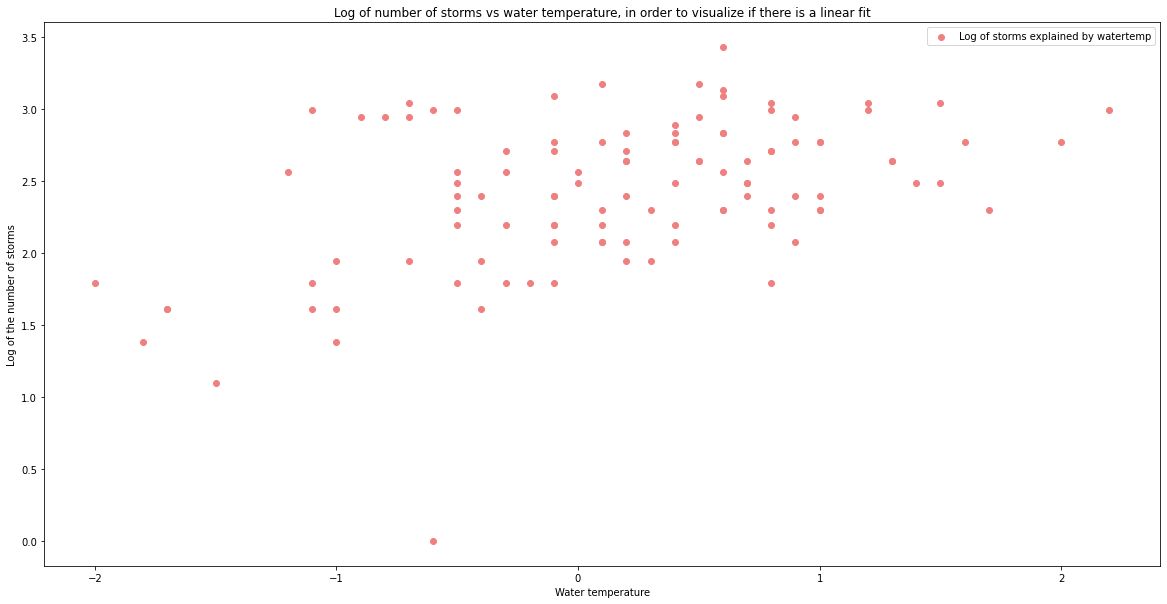

In [6]:
plt.subplots(figsize = (20, 10))
data_plot = data.sort_values(by='watertemp')
plt.scatter(data_plot['watertemp'], np.log(data_plot['storms']), label='Log of storms explained by watertemp', color='lightcoral')
plt.xlabel('Water temperature')
plt.ylabel('Log of the number of storms')
plt.title('Log of number of storms vs water temperature, in order to visualize if there is a linear fit')
plt.legend()
plt.show()

I used this visual because using a Poisson Regression is equivalent to work with a GLM where we simulate 
$$
\mathbb{E}(y|x) =  e^{\beta^Tx_i}
$$
Therefore, I plotted ln(y) and explored whether there was a linear relationship with X.
And here, we can see that it is reasonable to infer that there is one.

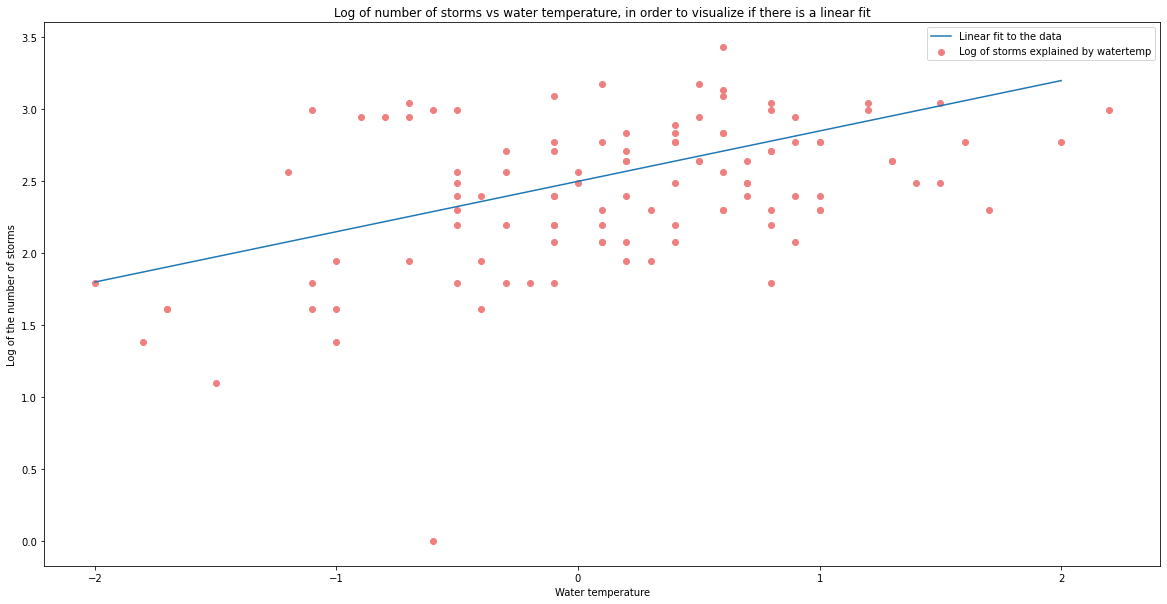

In [7]:
plt.subplots(figsize = (20, 10))
data_plot = data.sort_values(by='watertemp')
plt.scatter(data_plot['watertemp'], np.log(data_plot['storms']), label='Log of storms explained by watertemp', color='lightcoral')
plt.plot(np.linspace(-2, 2, 100), 2.5 + 0.35*np.linspace(-2, 2, 100), label='Linear fit to the data ')
plt.xlabel('Water temperature')
plt.ylabel('Log of the number of storms')
plt.title('Log of number of storms vs water temperature, in order to visualize if there is a linear fit')
plt.legend()
plt.show()

Reasonable coefficients for $\beta_0 = 2.5$, and for $\beta_1 = 0.35$ 

**1.7 Use you `pois_loglik` function to get the maximum likelihood estimates for $\beta_0$ and $\beta_1$ fit to predict `storms` from `watertemp` in the `atlanticstorms.csv` data set.  Print out your coefficient estimates.**

The likelihood is a concave function (ln is a concave function and -exp is also concave). Therefore, there is only one global maximum to our likelihood.

**1.8 Fit the standard linear regression model (feel free to use sklearn) to predict `np.log(storms)` from `watertemp` in the `atlanticstorms.csv` data set and print out your coefficient estimates.  Compare the estimates for the coefficients in this model to the Poisson regression model.  What do these models say about the association between the number of storms in the Atlantic (on the original scale) and the water temperature in the Gulf of Mexico?**

In [8]:
# your code here
lr = LinearRegression().fit(data['watertemp'].values.reshape(-1, 1), np.log(data['storms']))
print('The coefficients estimate of the model assuming normal errors are ', lr.intercept_, *lr.coef_)

The coefficients estimate of the model assuming normal errors are  2.382640233518301 0.2935811612011948


The estimates for the coefficients in the linear regression model are pretty close to the ones we estimated thanks to ML for the Poisson model. These models say that it is pretty credible to infer that there is a relationship (that can be linear-encoded) between the log- number of storms in the Atlantic and the water temperature in the Guld of Mexico.